In [1]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

In [2]:
q_df = pd.read_csv('../log_parsing/output/teraterm/processed/teraterm - orientation_info_processed.csv', index_col = 0)

In [3]:
def quat_mult(q, p):
    Q_mat = np.array([[q[0], -q[1], -q[2], -q[3]], [q[1], q[0], -q[3], q[2]], [q[2], q[3], q[0], -q[1]], [q[3], -q[2], q[1], q[0]]])
    return np.squeeze(np.matmul(Q_mat, p))

def conj_q(q):
    return np.array([q[0], -q[1], -q[2], -q[3]])

In [4]:
ex = np.array([0, 1, 0, 0])
ey = np.array([0, 0, 1, 0])
ez = np.array([0, 0, 0, 1])

q_est = np.array([q_df['q0_estimated'], q_df['q1_estimated'], q_df['q2_estimated'], q_df['q3_estimated']])
q_raw = np.array([q_df['q0_raw'], q_df['q1_raw'], q_df['q2_raw'], q_df['q3_raw']])
size_df = np.shape(q_est)
coord_sys = []
for index in range(0, size_df[1]):
    quatx = quat_mult(quat_mult(conj_q(q_est[:, index]), ex), q_est[:, index])
    quaty = quat_mult(quat_mult(conj_q(q_est[:, index]), ey), q_est[:, index])
    quatz = quat_mult(quat_mult(conj_q(q_est[:, index]), ez), q_est[:, index])
    quatx_raw = quat_mult(quat_mult(conj_q(q_raw[:, index]), ex), q_raw[:, index])
    quaty_raw = quat_mult(quat_mult(conj_q(q_raw[:, index]), ey), q_raw[:, index])
    quatz_raw = quat_mult(quat_mult(conj_q(q_raw[:, index]), ez), q_raw[:, index])
    coord_sys.append({'ts': q_df['ts'][index],
                         'nx0_est': quatx[1],
                         'nx1_est': quatx[2],
                         'nx2_est': quatx[3],
                         'ny0_est': quaty[1],
                         'ny1_est': quaty[2],
                         'ny2_est': quaty[3],
                         'nz0_est': quatz[1],
                         'nz1_est': quatz[2],
                         'nz2_est': quatz[3],
                         'nx0_raw': quatx_raw[1],
                         'nx1_raw': quatx_raw[2],
                         'nx2_raw': quatx_raw[3],
                         'ny0_raw': quaty_raw[1],
                         'ny1_raw': quaty_raw[2],
                         'ny2_raw': quaty_raw[3],
                         'nz0_raw': quatz_raw[1],
                         'nz1_raw': quatz_raw[2],
                         'nz2_raw': quatz_raw[3]})

coord_sys_df = pd.DataFrame(coord_sys)

In [5]:
coord_sys_df

ts    nx0_est    nx1_est   nx2_est    ny0_est    ny1_est   ny2_est  \
0      0.001  76.464093 -65.027766  0.975394  65.006866  76.377981 -4.102518   
1      0.011  75.180200 -65.938484  0.957640  65.920360  75.103640 -3.848716   
2      0.021  83.334398 -56.620816  0.691952  56.603152  83.261728 -3.819074   
3      0.031  83.470871 -55.070878  0.669254  55.053122  83.397431 -3.828586   
4      0.041  86.277176 -50.798280  0.573318  50.779368  86.200710 -3.929176   
...      ...        ...        ...       ...        ...        ...       ...   
2000  20.001  71.519112 -69.960960  0.954470  69.939120  71.444630 -3.822912   
2001  20.011  70.610564 -70.798540  0.947102  70.777148  70.539170 -3.742036   
2002  20.021  70.550680 -70.838218  0.966824  70.817590  70.479176 -3.733768   
2003  20.031  68.129774 -73.263688  1.034296  73.240952  68.054624 -3.825566   
2004  20.041  67.937487 -73.354334  1.037838  73.331598  67.862337 -3.823286   

       nz0_est   nz1_est     nz2_est    nx0_raw    nx1_raw   nx2_raw  \
0     1.915494  3.756718  100.292259  76.749476 -64.069128  0.840216   
1     1.818484  3.524600   99.925640  75.053789 -66.042932  0.831752   
2     1.574416  3.547582  100.677472  83.412512 -55.117616  0.572768   
3     1.550246  3.564086   99.927623  83.528497 -54.943878  0.566946   
4     1.499910  3.676600  100.043880  86.411544 -50.297728  0.465018   
...        ...       ...         ...        ...        ...       ...   
2000  1.991590  3.399888   99.974520  71.237129 -70.172190  0.837978   
2001  1.981310  3.312740   99.921380  70.515062 -70.869124  0.844628   
2002  1.963880  3.319480   99.907510  70.548873 -70.839872  0.843816   
2003  2.097784  3.362146   99.972992  67.833043 -73.441582  0.943046   
2004  2.100514  3.358938   99.908673  67.909359 -73.365952  0.932976   

        ny0_raw    ny1_raw   ny2_raw   nz0_raw   nz1_raw    nz2_raw  
0     64.044408  76.666404 -4.076456  1.967976  3.667496  99.893532  
1     66.021428  74.981629 -3.789232  1.879288  3.393872  99.901861  
2     55.098272  83.344672 -3.711184  1.568464  3.411872  99.909088  
3     54.923466  83.458513 -3.774978  1.601262  3.465234  99.907903  
4     50.276112  86.338614 -3.871552  1.546042  3.579792  99.909096  
...         ...        ...       ...       ...       ...        ...  
2000  70.146978  71.166345 -3.784154  2.059110  3.283610  99.922695  
2001  70.845188  70.447172 -3.698026  2.026196  3.206762  99.905612  
2002  70.815936  70.480983 -3.698272  2.025512  3.207264  99.908727  
2003  73.416106  67.760723 -3.799582  2.151902  3.270394  99.902707  
2004  73.340608  67.837809 -3.781704  2.142096  3.253176  99.899663  

[2005 rows x 19 columns]

In [6]:
#
#
#DONT USE THIS ONE, LOOK FURTHER DOWN
#
#

class Visualizer(object):
    def __init__(self):
        self.traces = dict()
        self.app = QtGui.QApplication(sys.argv)
        self.w = gl.GLViewWidget()
        self.w.opts['distance'] = 40
        self.w.setWindowTitle('pyqtgraph example: GLLinePlotItem')
        self.w.setGeometry(0, 110, 1920, 1080)
        self.w.show()

        # create the background grids
        gx = gl.GLGridItem()
        gx.rotate(90, 0, 1, 0)
        gx.translate(-10, 0, 0)
        self.w.addItem(gx)
        gy = gl.GLGridItem()
        gy.rotate(90, 1, 0, 0)
        gy.translate(0, -10, 0)
        self.w.addItem(gy)
        gz = gl.GLGridItem()
        gz.translate(0, 0, -10)
        self.w.addItem(gz)

        self.n = 50
        self.m = 1000
        self.y = np.linspace(-10, 10, self.n)
        self.x = np.linspace(-10, 10, self.m)
        self.phase = 0

        for i in range(self.n):
            yi = np.array([self.y[i]] * self.m)
            d = np.sqrt(self.x ** 2 + yi ** 2)
            z = 10 * np.cos(d + self.phase) / (d + 1)
            pts = np.vstack([self.x, yi, z]).transpose()
            self.traces[i] = gl.GLLinePlotItem(pos=pts, color=pg.glColor(
                (i, self.n * 1.3)), width=(i + 1) / 10, antialias=True)
            self.w.addItem(self.traces[i])

    def start(self):
        if (sys.flags.interactive != 1) or not hasattr(QtCore, 'PYQT_VERSION'):
            QtGui.QApplication.instance().exec_()

    def set_plotdata(self, name, points, color, width):
        self.traces[name].setData(pos=points, color=color, width=width)

    def update(self):
        for i in range(self.n):
            yi = np.array([self.y[i]] * self.m)
            d = np.sqrt(self.x ** 2 + yi ** 2)
            z = 10 * np.cos(d + self.phase) / (d + 1)
            pts = np.vstack([self.x, yi, z]).transpose()
            self.set_plotdata(
                name=i, points=pts,
                color=pg.glColor((i, self.n * 1.3)),
                width=(i + 1) / 10
            )
            self.phase -= .003

    def animation(self):
        timer = QtCore.QTimer()
        timer.timeout.connect(self.update)
        timer.start(20)
        self.start()


# Start Qt event loop unless running in interactive mode.
if __name__ == '__main__':
    v = Visualizer()
    v.animation()

Unable to load numpy_formathandler accelerator from OpenGL_accelerate


In [ ]:
#https://stackoverflow.com/questions/53640316/how-to-draw-a-polyline-by-xyz-coordinates-using-opengl-and-python
from pyqtgraph.Qt import QtCore, QtGui
from pyqtgraph.Qt import QtWidgets
import pyqtgraph.opengl as gl
import pyqtgraph as pg
import sys
import numpy as np

if __name__ == '__main__':
    app = QtWidgets.QApplication(sys.argv)
    w = gl.GLViewWidget()
    # create the background grids
    gx = gl.GLGridItem()
    gx.rotate(90, 0, 1, 0)
    gx.translate(-10, 0, 0)
    w.addItem(gx)
    gy = gl.GLGridItem()
    gy.rotate(90, 1, 0, 0)
    gy.translate(0, -10, 0)
    w.addItem(gy)
    gz = gl.GLGridItem()
    gz.translate(0, 0, -10)
    w.addItem(gz)


    Origin = (0, 0, 0)
    Xdot = (1, 0, 0)
    Ydot = (0, 1, 0)
    Zdot = (0, 0, 1)
    # this makes 3 lines, 1: from origin to X, 2: from origion to Y, 3: from origin to Z
    pts = np.array([Origin, Xdot, Origin, Ydot, Origin, Zdot])
    sh1 = gl.GLLinePlotItem(pos=pts, width=1, antialias=False)
    w.addItem(sh1)
    w.show()
    app.exec()

Unable to load numpy_formathandler accelerator from OpenGL_accelerate


[[0 0 0]
 [1 0 0]
 [0 0 0]
 [0 0 1]
 [0 0 0]
 [0 1 0]]


In [2]:
import numpy as np
xx = 0
yx = 0
zx = 0

xy = 1
yy = 0
zy = 0

Xdot = (xx, yx, zx)
Ydot = (xy, yy, zy)
Zdot = (-1, 0, 0)
pts = np.array([Xdot, Ydot, Zdot])
pts

array([[ 0,  0,  0],
       [ 1,  0,  0],
       [-1,  0,  0]])

In [ ]:
def ax0_lines(df):
    x_points = []
    y_points = []
    z_points = []
    for index, row in df.iterrows():
        x_points.extend([0, row['nx0_est']])
        y_points.extend([0, row['nx1_est']])
        z_points.extend([0, row['nx2_est']])
    return x_points, y_points, z_points

def ax1_lines(df):
    x_points = []
    y_points = []
    z_points = []
    for index, row in df.iterrows():
        x_points.extend([0, row['ny0_est']])
        y_points.extend([0, row['ny1_est']])
        z_points.extend([0, row['ny2_est']])
    return x_points, y_points, z_points

def ax2_lines(df):
    x_points = []
    y_points = []
    z_points = []
    for index, row in df.iterrows():
        x_points.extend([0, row['nz0_est']])
        y_points.extend([0, row['nz1_est']])
        z_points.extend([0, row['nz2_est']])
    return x_points, y_points, z_points

origin_point = go.Scatter3d(
    x=[0], y=[0], z=[0],
    marker=dict(
        size=20,
        color=0,
    )
)

x_points, y_points, z_points = ax0_lines(coord_sys_df)
ax0_trace = go.Scatter3d(
    x=x_points, y=y_points, z=z_points,
     marker=dict(
        size=0,
        color='black',
        colorscale='Viridis',
    ),
    line=dict(
        color='red',
        width=2
    )
)


x_points, y_points, z_points = ax1_lines(coord_sys_df)
ax1_trace = go.Scatter3d(
    x=x_points, y=y_points, z=z_points,
     marker=dict(
        size=0,
        color='black',
        colorscale='Viridis',
        #symbol = 'x'
    ),
    line=dict(
        color='green',
        width=2
    )
)


x_points, y_points, z_points = ax2_lines(coord_sys_df)
ax2_trace = go.Scatter3d(
    x=x_points, y=y_points, z=z_points,
     marker=dict(
        size=0,
        color='black',
        colorscale='Viridis',
    ),
    line=dict(
        color='blue',
        width=2
    )
)



fig = go.Figure(data=[origin_point, ax0_trace, ax1_trace, ax2_trace])

fig.update_layout(
    width=1000,
    height=1000,
    autosize=False,
    scene=dict(
        camera=dict(
            up=dict(
                x=0,
                y=0,
                z=1
            ),
            eye=dict(
                x=0,
                y=1,
                z=1,
            )
        ),
        aspectratio = dict(x=1, y=1, z=1),
        aspectmode = 'manual',
        xaxis=dict(range=[-2, 2], autorange=False),
        yaxis=dict(range=[-2, 2], autorange=False),
        zaxis=dict(range=[-2, 2], autorange=False)
    ),
)

fig.show()

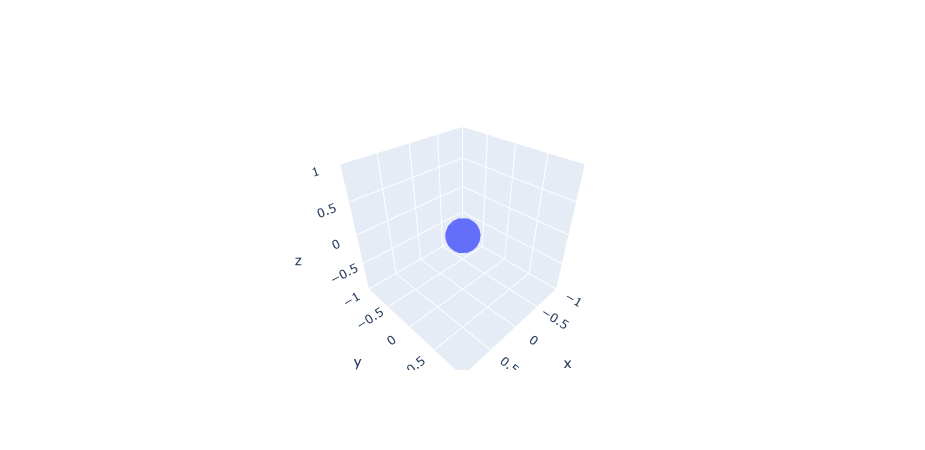

In [112]:
def ax0_line(row):
    x_points = [0, row['nx0_est']]
    y_points = [0, row['nx1_est']]
    z_points = [0, row['nx2_est']]
    return x_points, y_points, z_points

def ax1_line(row):
    x_points = [0, row['ny0_est']]
    y_points = [0, row['ny1_est']]
    z_points = [0, row['ny2_est']]
    return x_points, y_points, z_points

def ax2_line(row):
    x_points = [0, row['nz0_est']]
    y_points = [0, row['nz1_est']]
    z_points = [0, row['nz2_est']]
    return x_points, y_points, z_points



frames = []

origin_point = go.Scatter3d(
    x=[0], y=[0], z=[0],
    marker=dict(
        size=20,
        color=0,
    )
)


for index, row in coord_sys_df.iterrows():
    x0_points, y0_points, z0_points = ax0_line(row)
    x1_points, y1_points, z1_points = ax1_line(row)
    x2_points, y2_points, z2_points = ax2_line(row)
    
    axes = go.Scatter3d(
    x=[0, 0] + x0_points + x1_points + x2_points,
    y=[0, 0] + y0_points + y1_points + y2_points,
    z=[0, 0] + z0_points + z1_points + z2_points,
     marker=dict(
        size=[20, 5],
        color='black',
         opacity = 1
    ),
    line=dict(
        color=['black', 'black', 'red', 'red', 'green', 'green', 'blue', 'blue'],
        width=5
     )
    )
    
    
#     x_points, y_points, z_points = ax1_line(row)
    
#     ax1_trace = go.Scatter3d(
#     x=x_points, y=y_points, z=z_points,
#      marker=dict(
#         size=0,
#         color='black',
#         colorscale='Viridis',
#         #symbol = 'x'
#     ),
#     line=dict(
#         color='green',
#         width=2
#     )
#    )
    

    
#     x_points, y_points, z_points = ax2_line(row)
    
#     ax2_trace = go.Scatter3d(
#     x=x_points, y=y_points, z=z_points,
#      marker=dict(
#         size=0,
#         color='black',
#         colorscale='Viridis',
#     ),
#     line=dict(
#         color='blue',
#         width=2
#     )
#    )

    frames.append(go.Frame(data = [axes], name=f'frame{index}'))

fig_anim = go.Figure(data=[origin_point])
fig_anim.update(frames=frames)

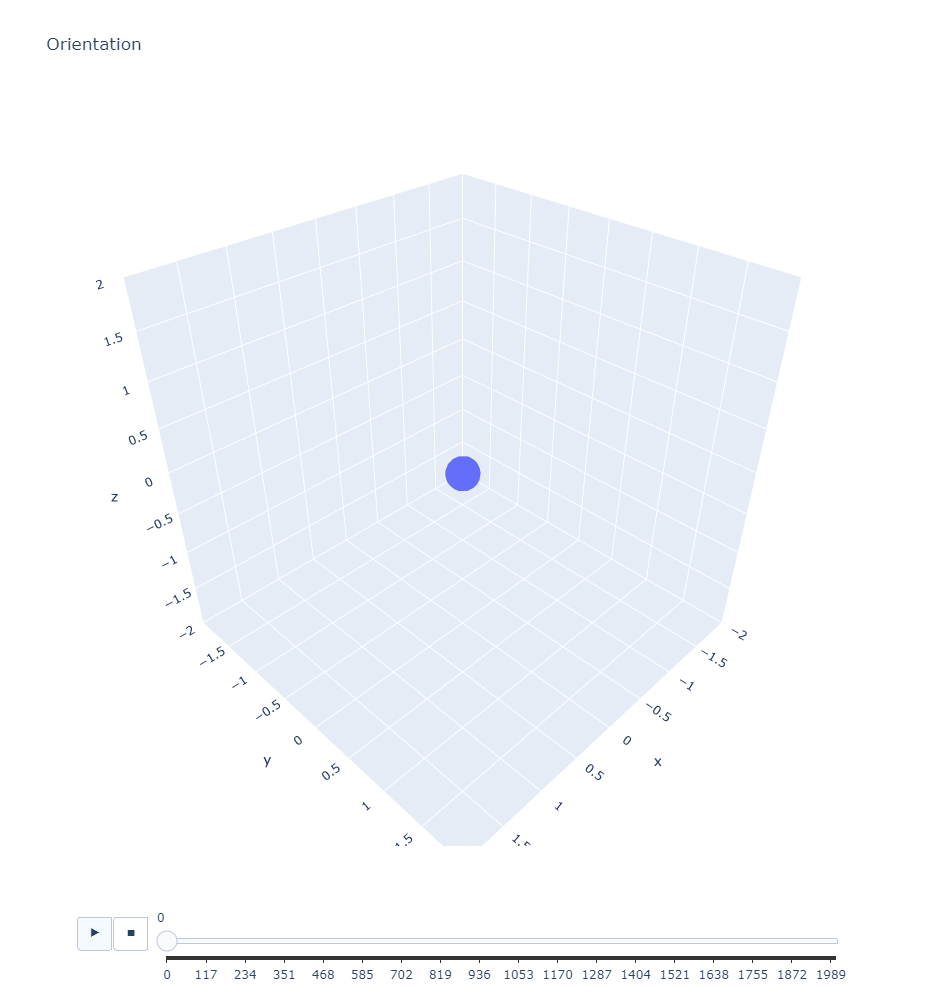

In [113]:
def frame_args(duration):
    return {
            "frame": {"duration": duration},
            "mode": "immediate",
            "fromcurrent": True,
            "transition": {"duration": duration, "easing": "linear"},
        }

sliders = [
            {
                "pad": {"b": 10, "t": 60},
                "len": 0.9,
                "x": 0.1,
                "y": 0,
                "steps": [
                    {
                        "args": [[f.name], frame_args(-1)],
                        "label": str(k),
                        "method": "animate",
                    }
                    for k, f in enumerate(fig_anim.frames)
                ],
            }
        ]

# Layout
fig_anim.update_layout(
         title='Orientation',
         width=1000,
         height=1000,
         scene=dict(
                    
                    xaxis=dict(range=[-2, 2], autorange=False),
                    yaxis=dict(range=[-2, 2], autorange=False),
                    zaxis=dict(range=[-2, 2], autorange=False),
                    aspectratio=dict(x=1, y=1, z=1),
                    ),
         updatemenus = [
            {
                "buttons": [
                    {
                        "args": [None, frame_args(50)],
                        "label": "&#9654;", # play symbol
                        "method": "animate",
                    },
                    {
                        "args": [[None], frame_args(0)],
                        "label": "&#9724;", # pause symbol
                        "method": "animate",
                    },
                ],
                "direction": "left",
                "pad": {"r": 10, "t": 70},
                "type": "buttons",
                "x": 0.1,
                "y": 0,
            }
         ],
         sliders=sliders
)